In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

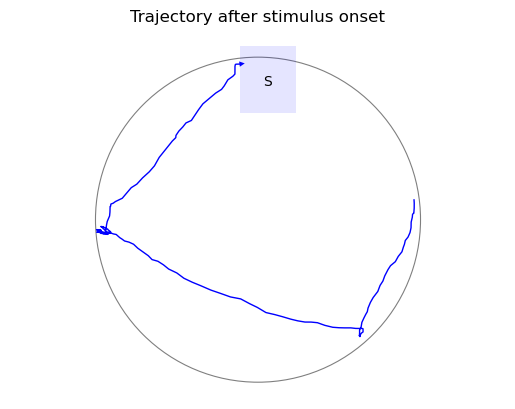

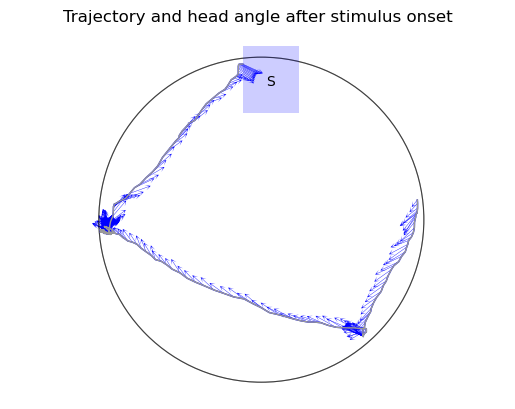

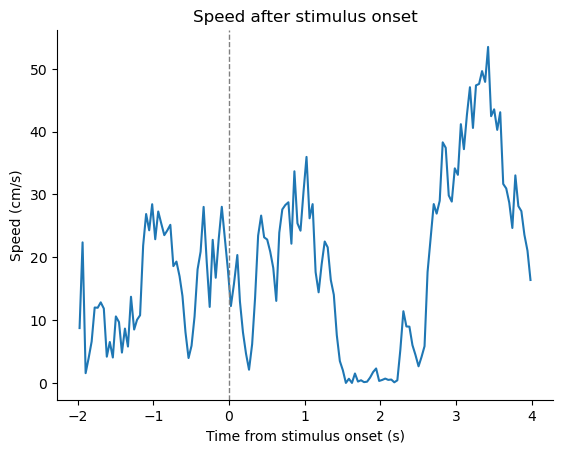

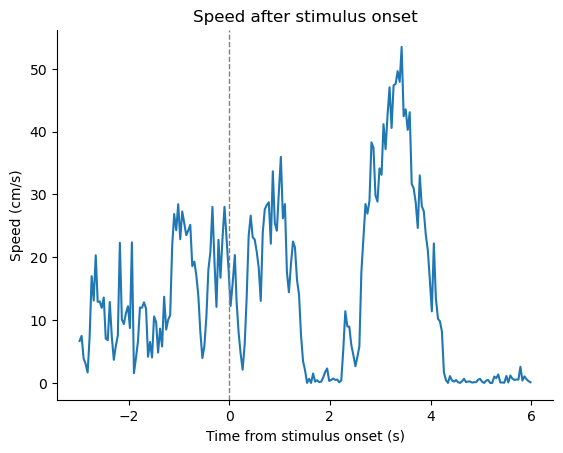

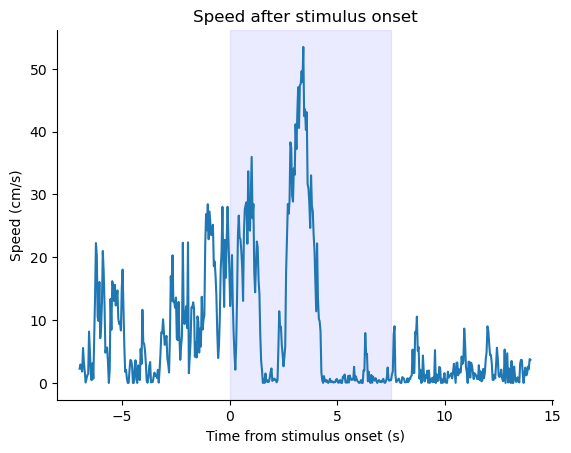

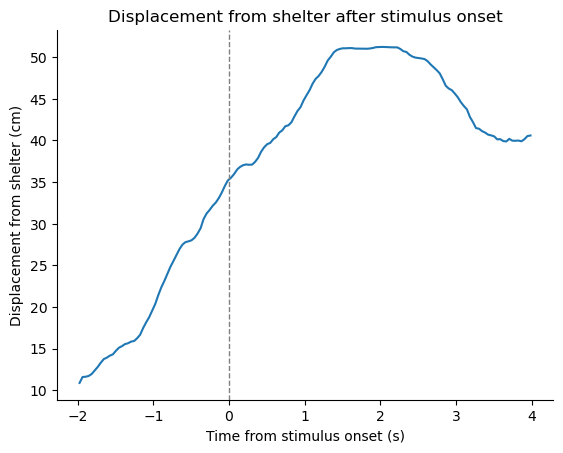

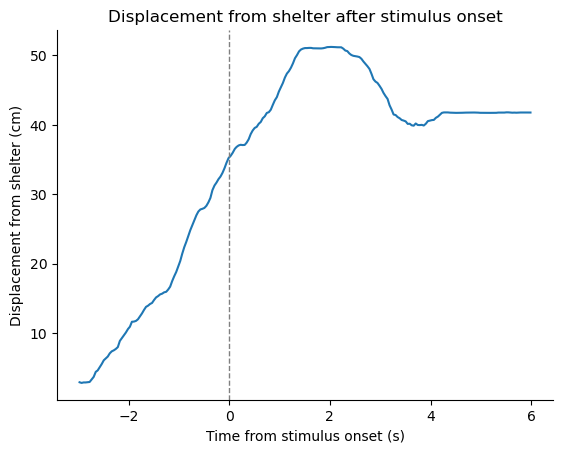

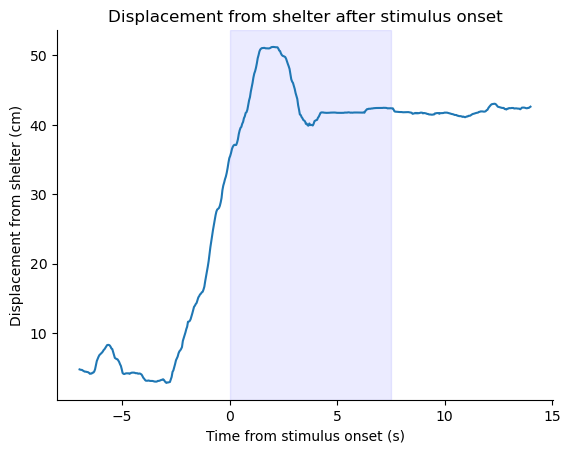

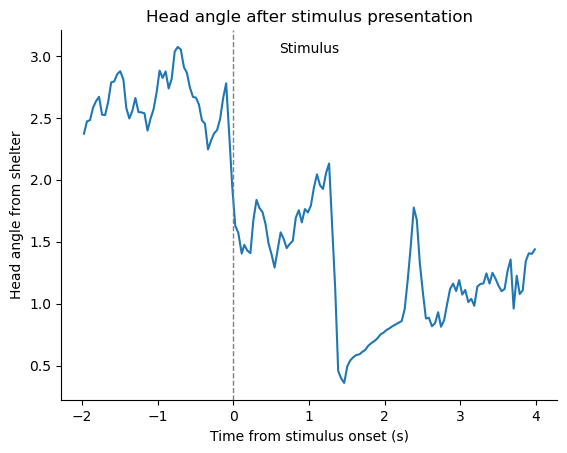

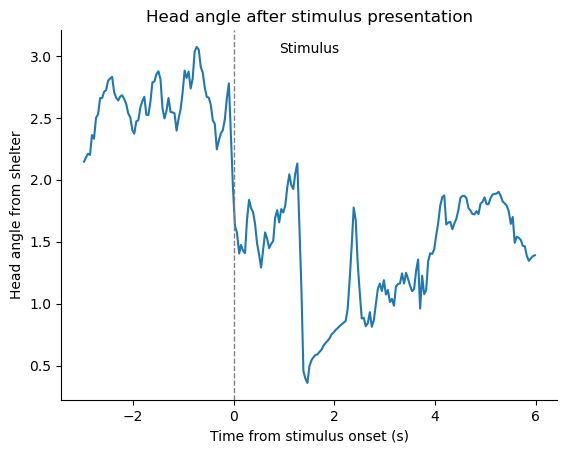

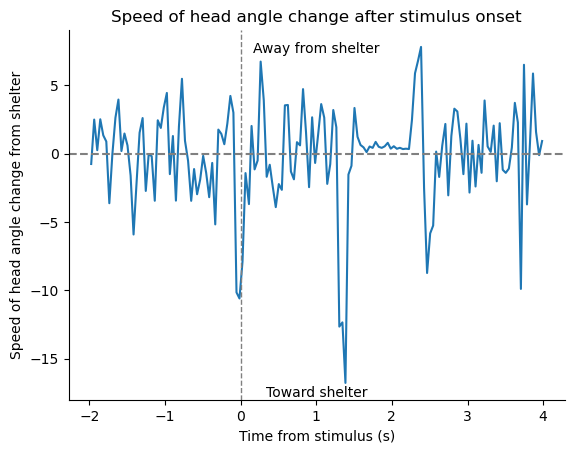

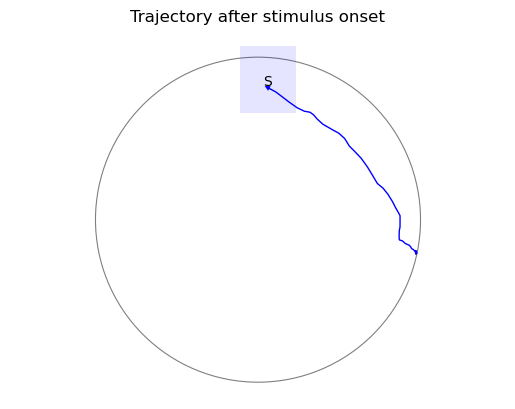

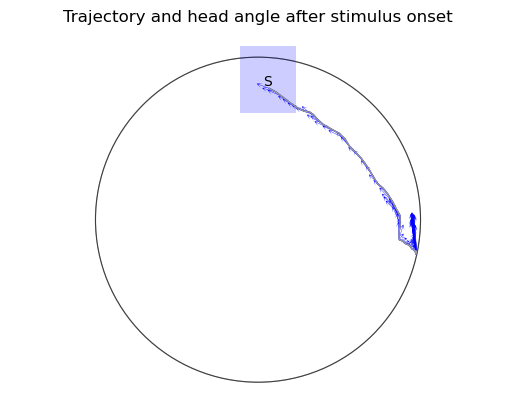

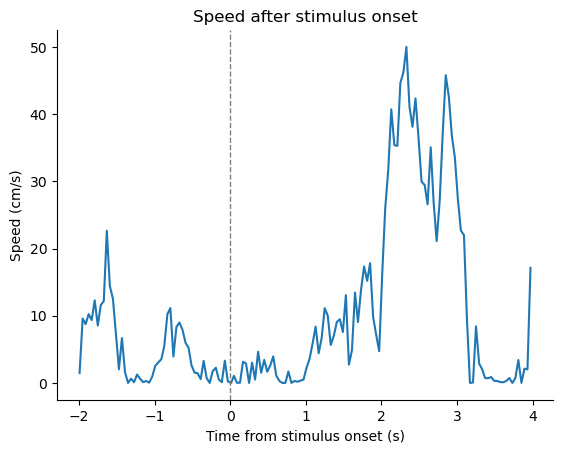

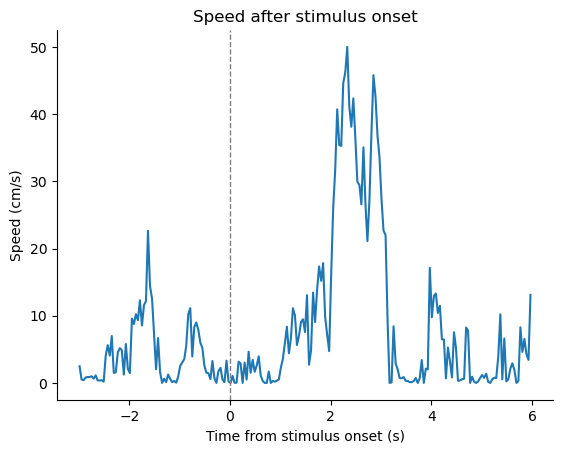

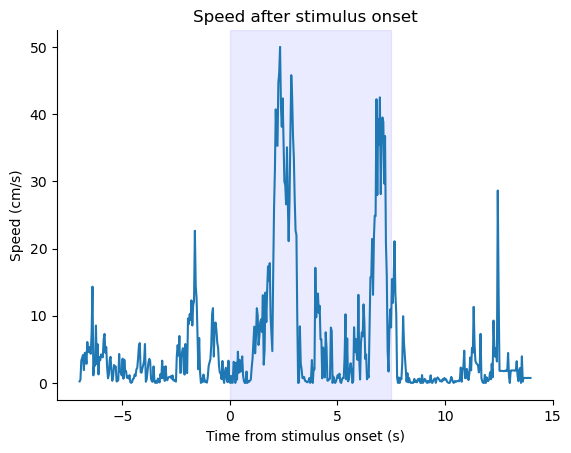

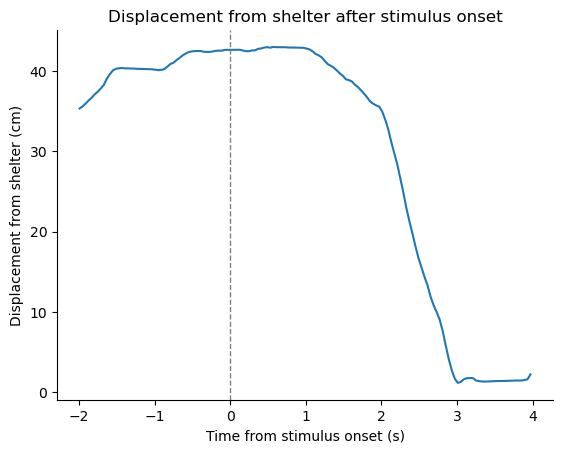

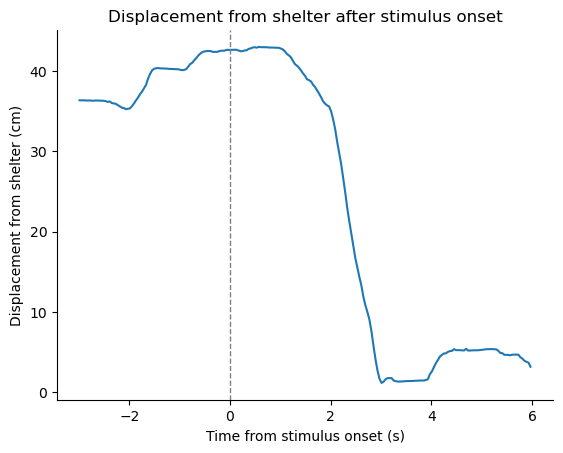

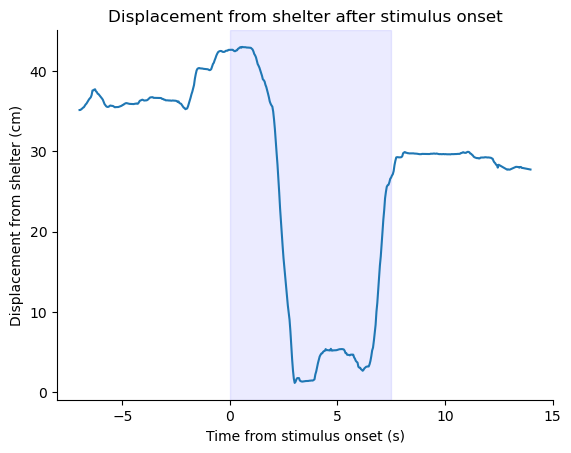

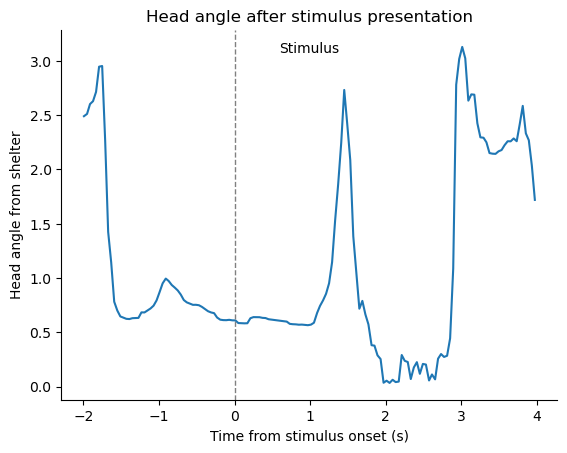

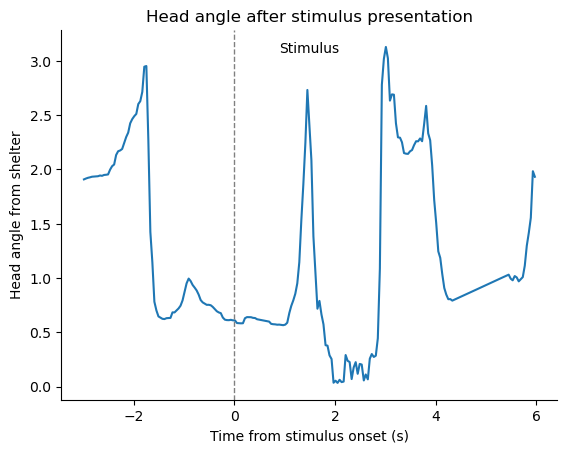

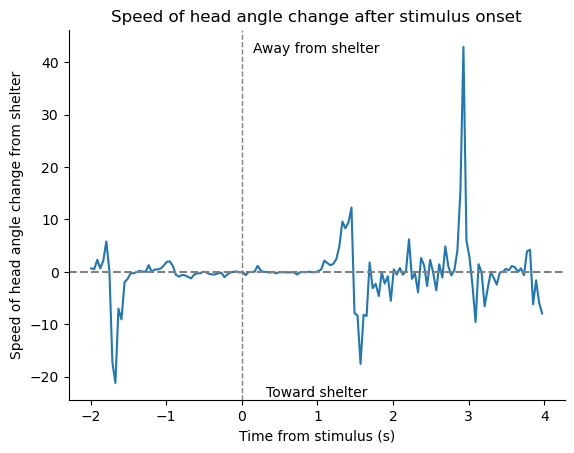

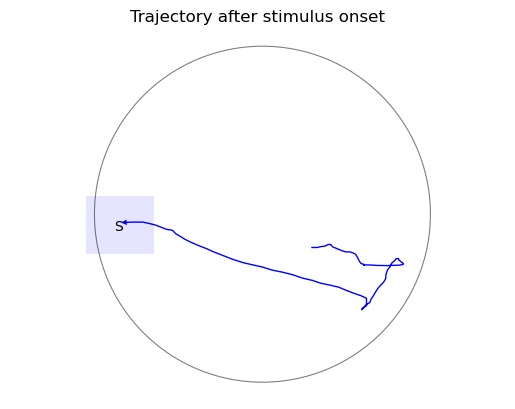

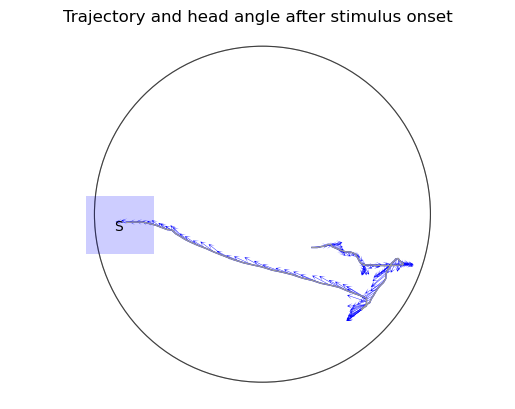

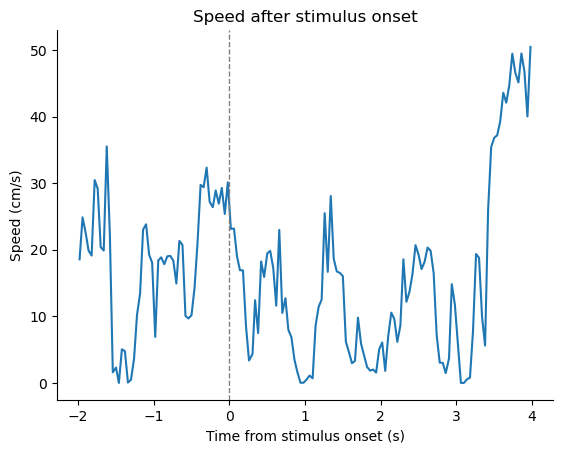

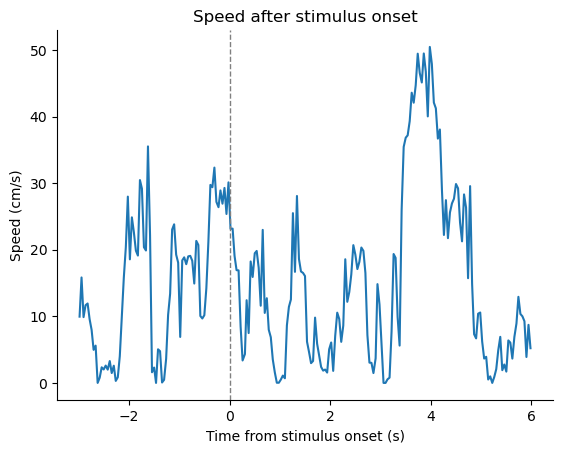

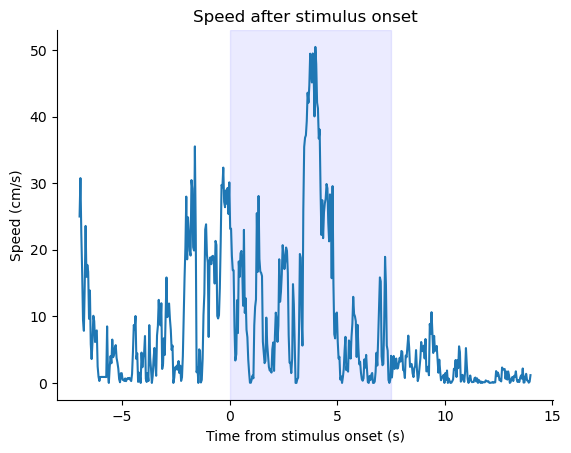

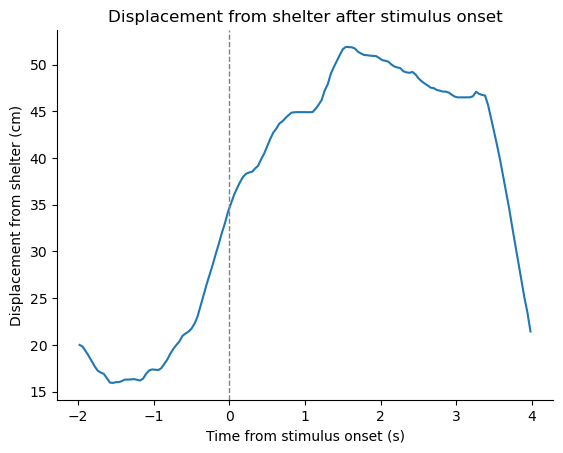

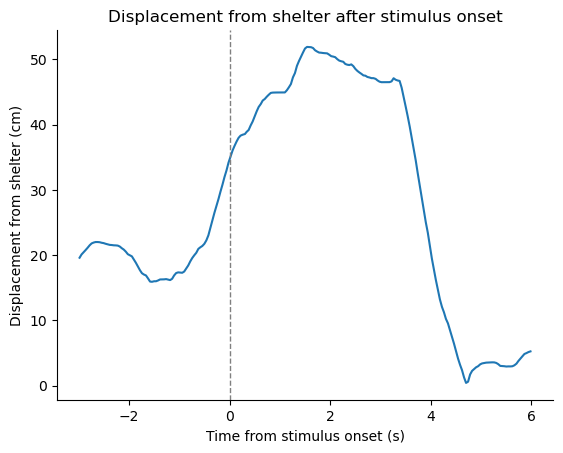

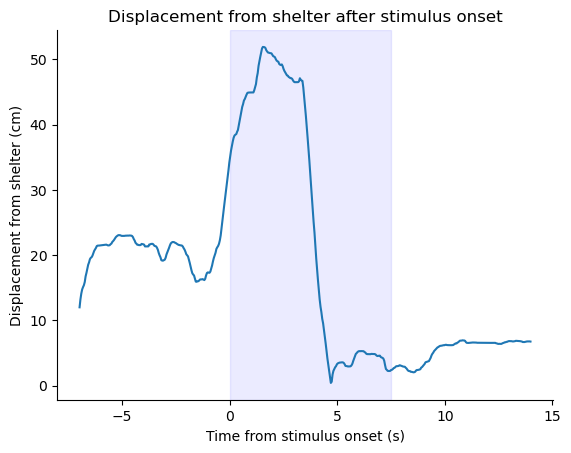

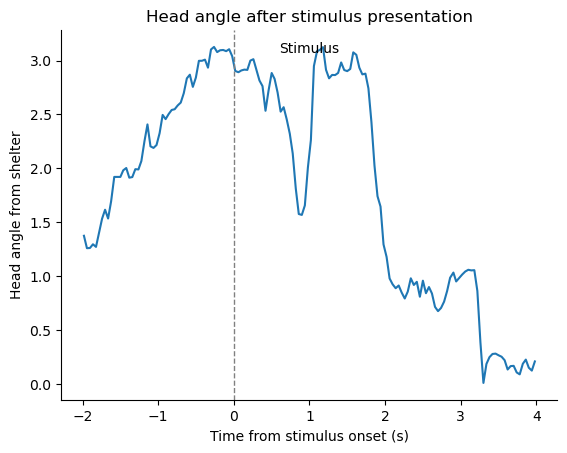

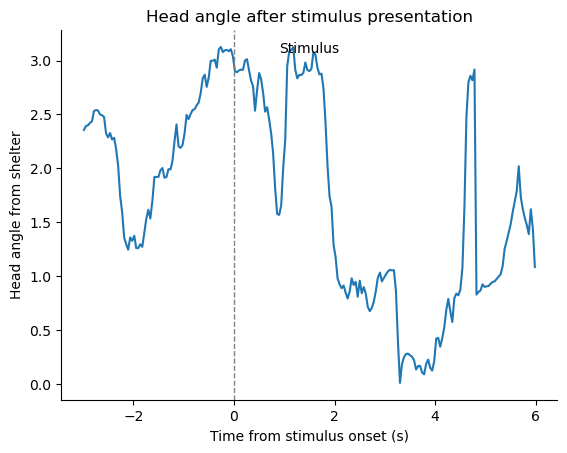

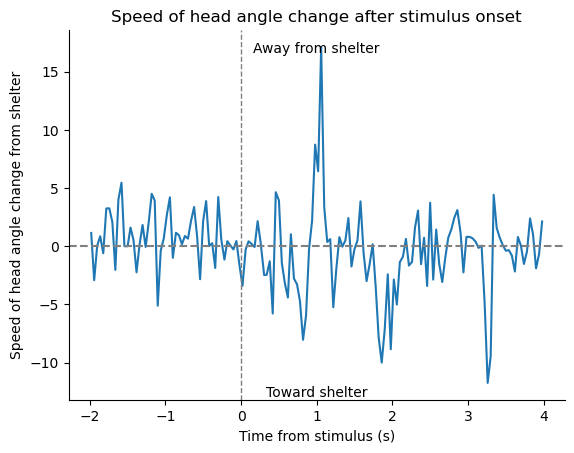

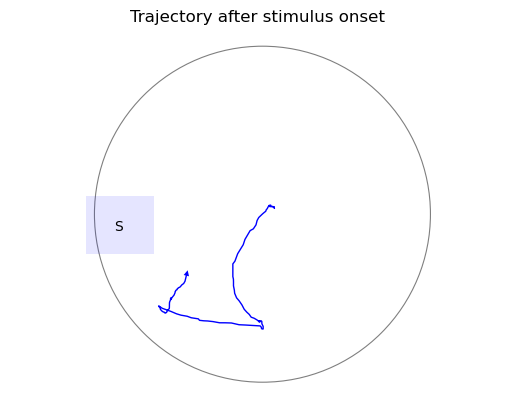

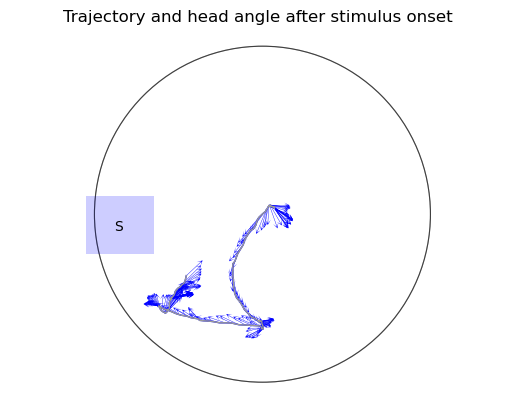

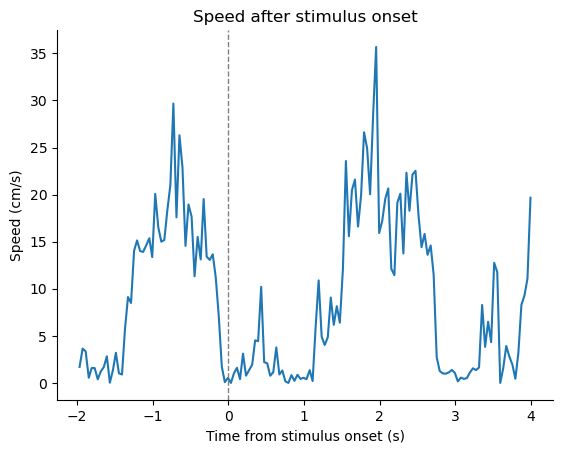

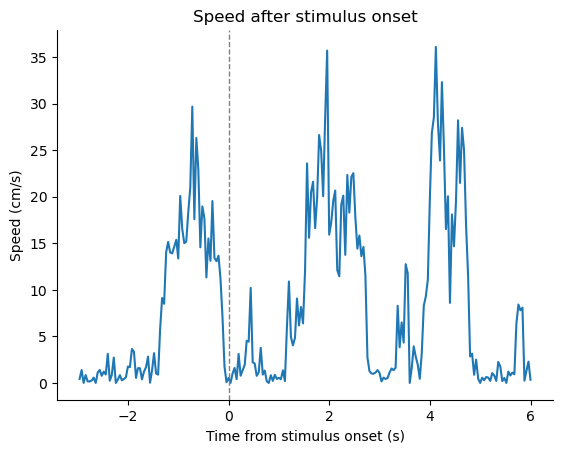

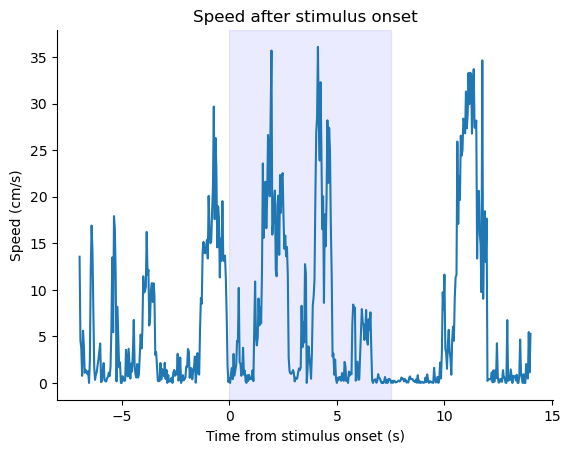

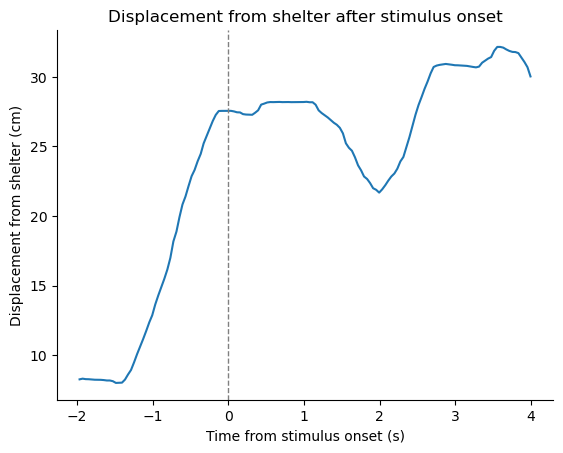

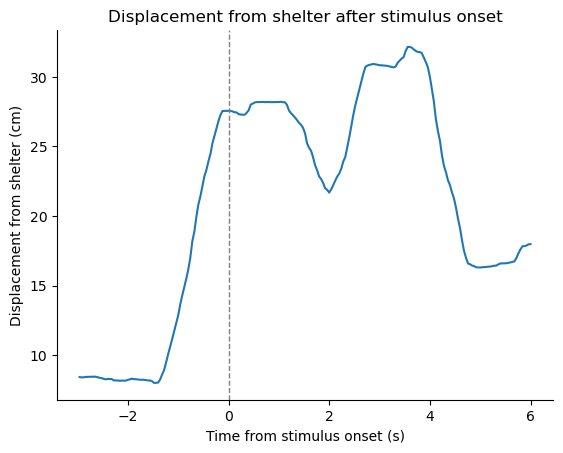

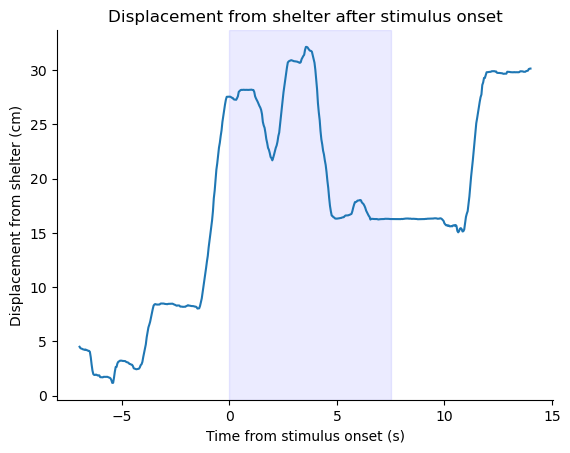

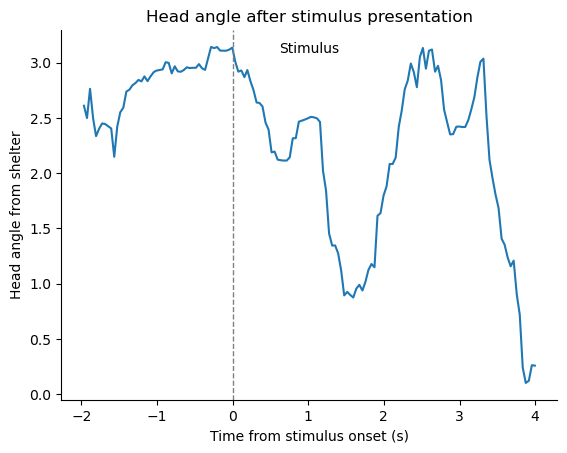

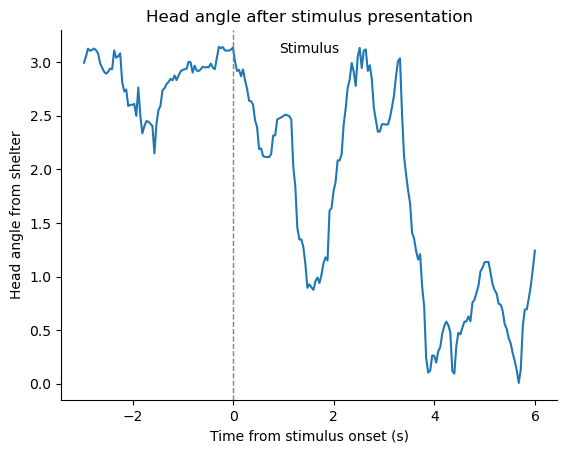

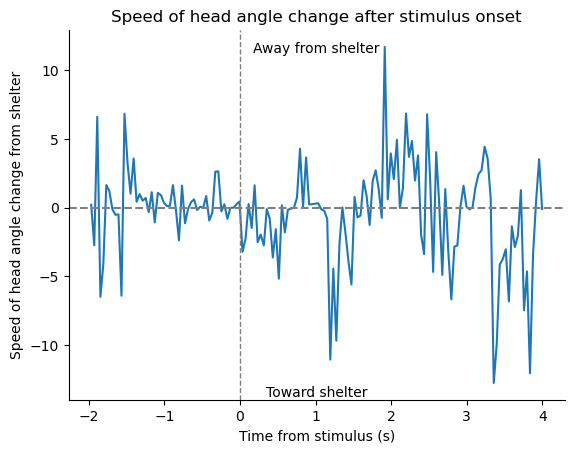

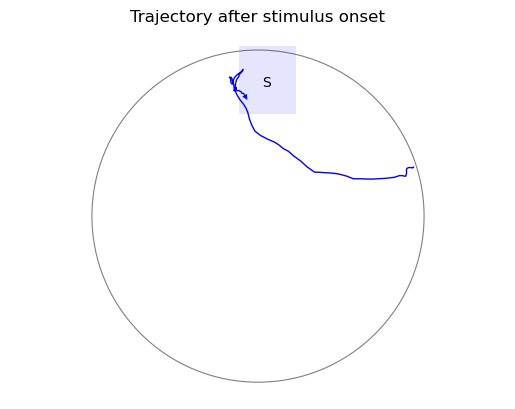

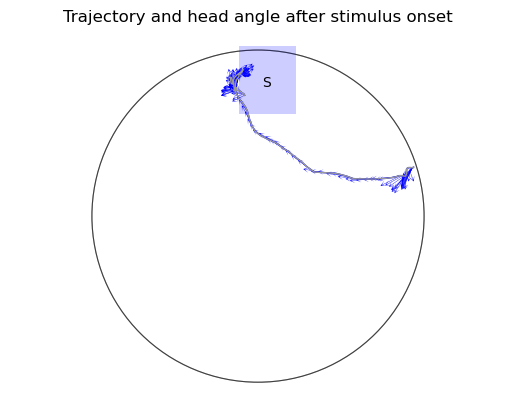

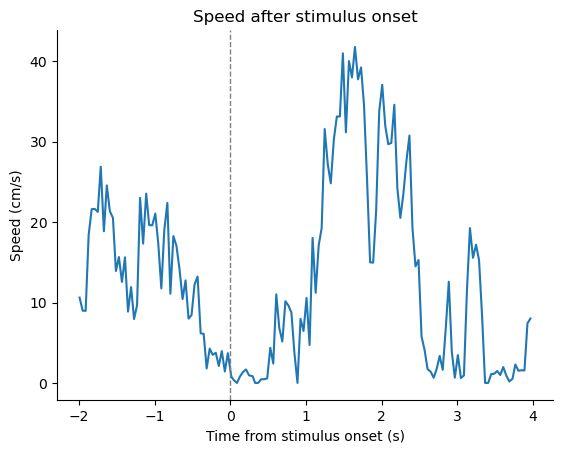

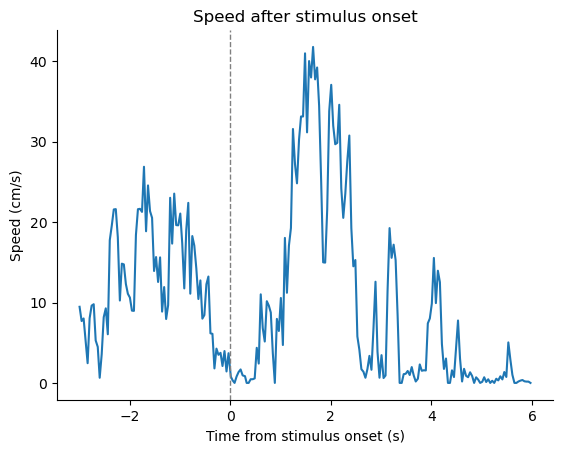

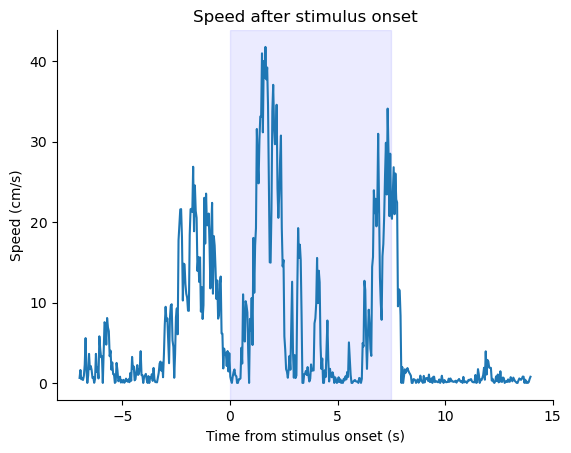

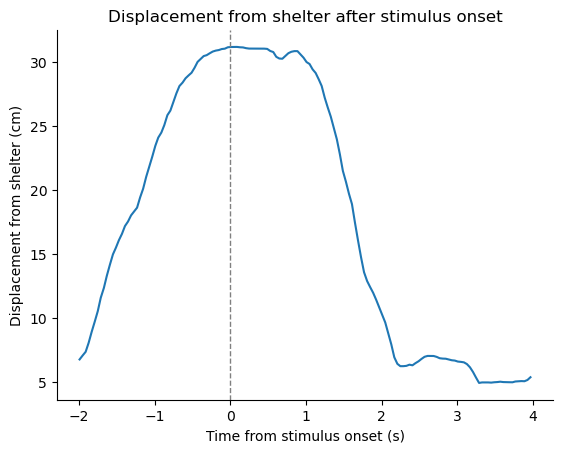

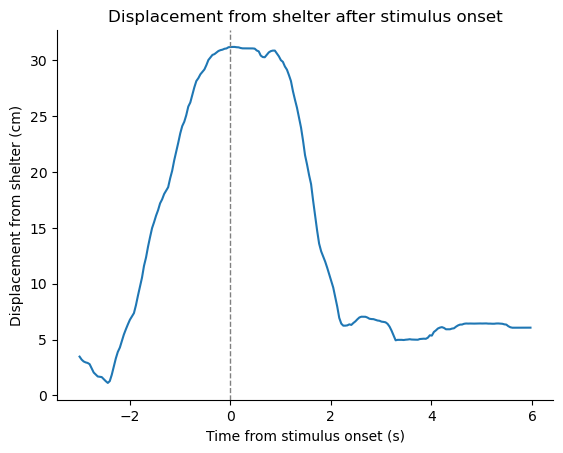

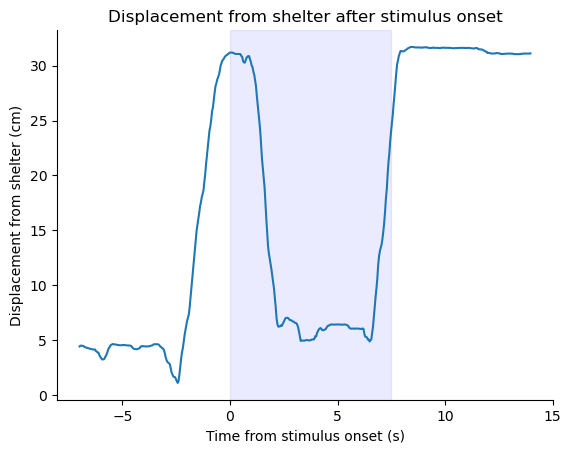

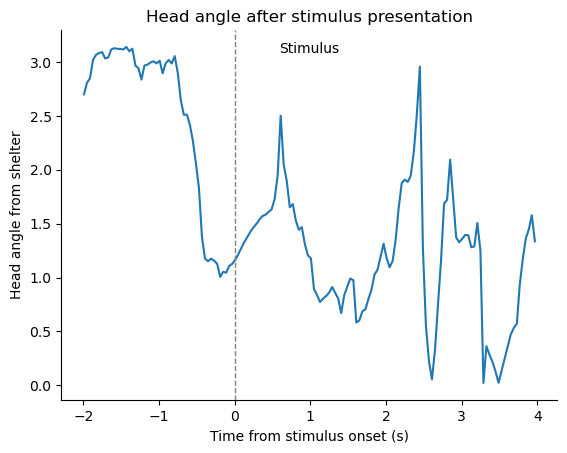

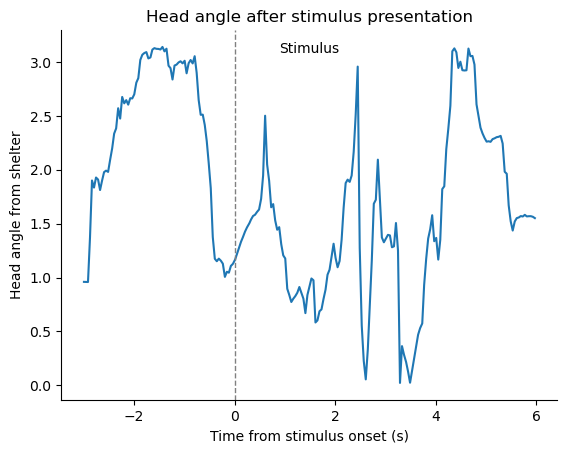

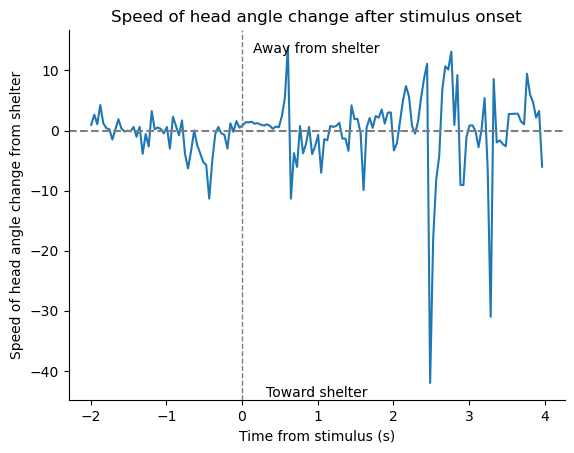

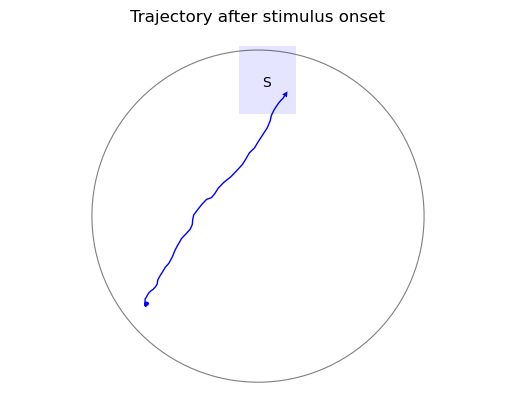

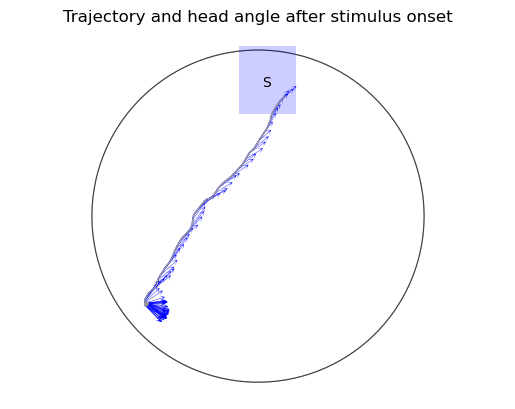

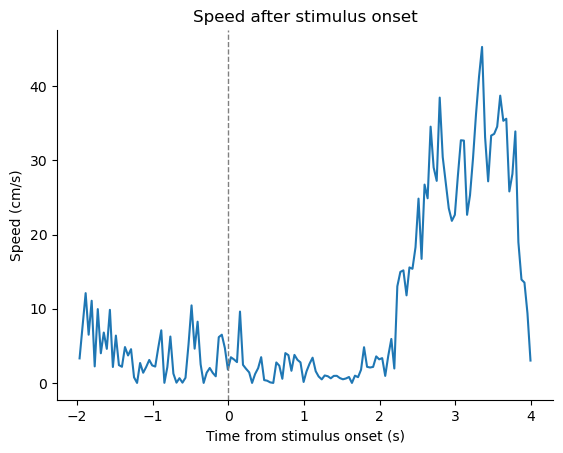

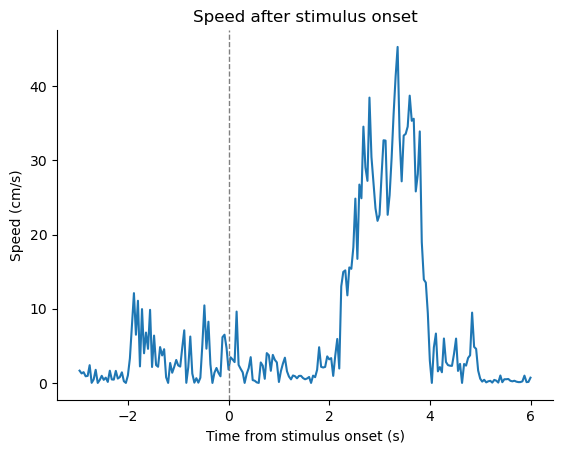

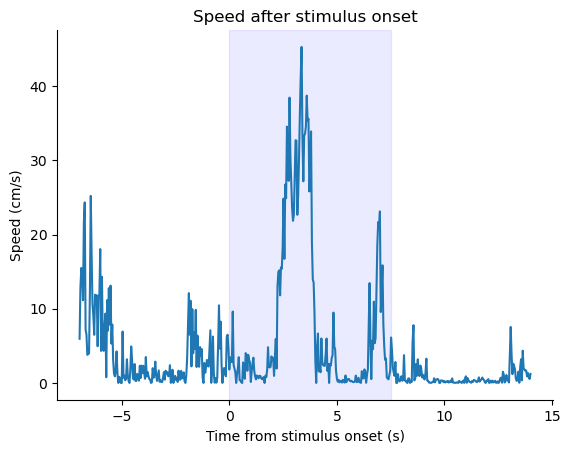

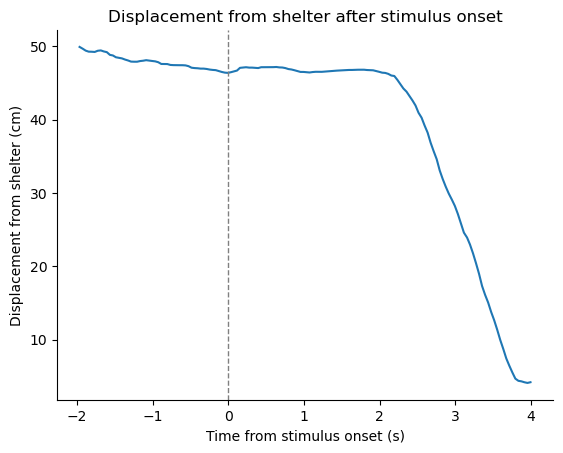

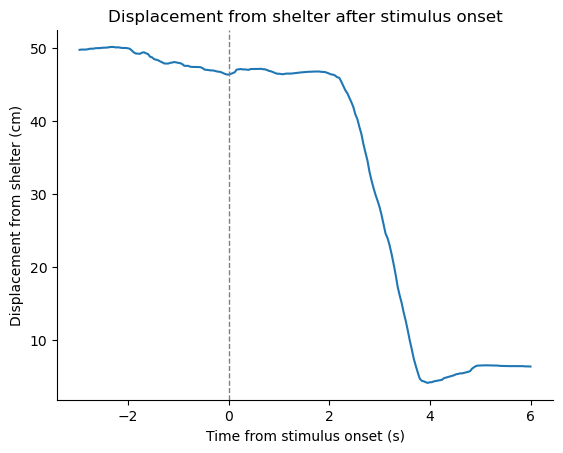

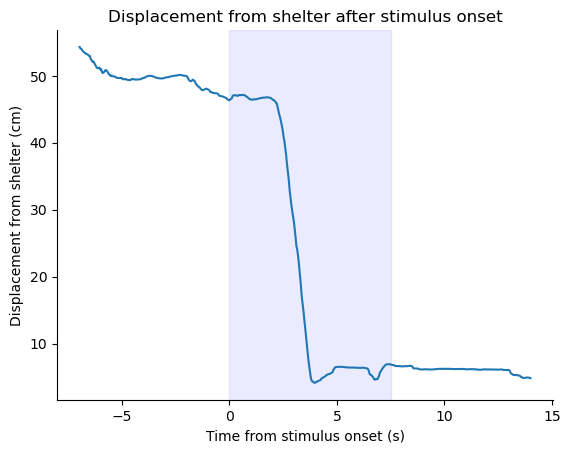

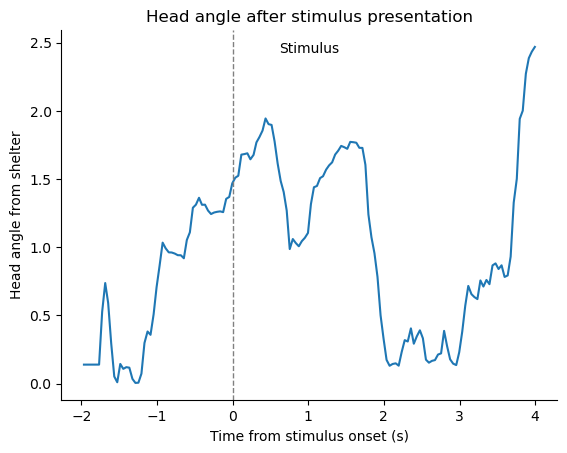

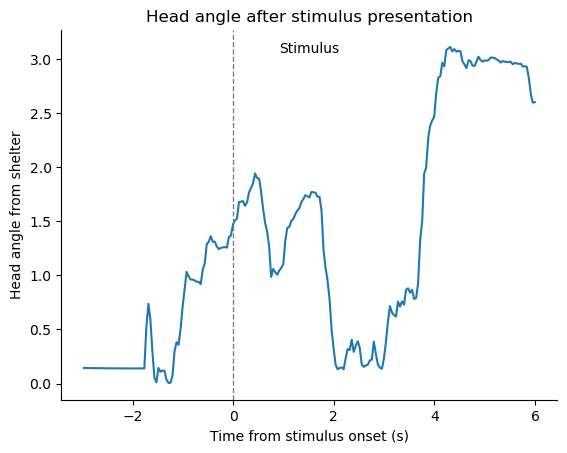

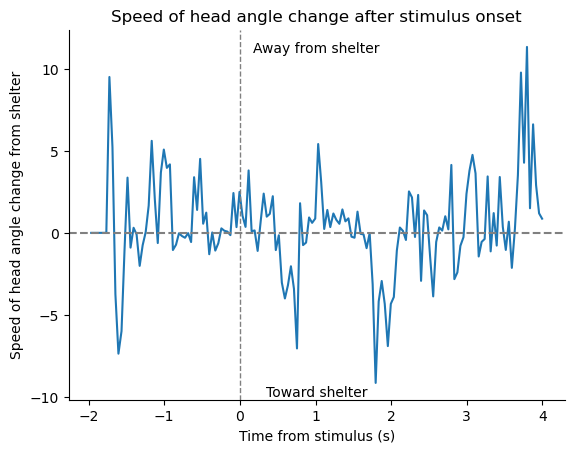

In [2]:
%run graphing_function_recent.ipynb

%run Control_1_stimulus1.ipynb
M1_coord_scaled = coord_scaled
M1_escape_only = escape_only
M1_four_second = four_second
M1_six_second = six_second
M1_long_range = long_range
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y

%run Control_1_stimulus2.ipynb
M2_coord_scaled = coord_scaled
M2_escape_only = escape_only
M2_four_second = four_second
M2_six_second = six_second
M2_long_range = long_range
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y

%run Control_3_stimulus1.ipynb
M3_coord_scaled = coord_scaled
M3_escape_only = escape_only
M3_four_second = four_second
M3_six_second = six_second
M3_long_range = long_range
M3_initial_displacement = initial_displacement
M3_total_distance = total_distance
M3_shelter_x = shelter_x
M3_shelter_y = shelter_y

%run Control_3_stimulus2.ipynb
M4_coord_scaled = coord_scaled
M4_escape_only = escape_only
M4_four_second = four_second
M4_six_second = six_second
M4_long_range = long_range
M4_initial_displacement = initial_displacement
M4_total_distance = total_distance
M4_shelter_x = shelter_x
M4_shelter_y = shelter_y

%run Control_4_stimulus1.ipynb
M5_coord_scaled = coord_scaled
M5_escape_only = escape_only
M5_four_second = four_second
M5_six_second = six_second
M5_long_range = long_range
M5_initial_displacement = initial_displacement
M5_total_distance = total_distance
M5_shelter_x = shelter_x
M5_shelter_y = shelter_y

%run Control_4_stimulus2.ipynb
M6_coord_scaled = coord_scaled
M6_escape_only = escape_only
M6_four_second = four_second
M6_six_second = six_second
M6_long_range = long_range
M6_initial_displacement = initial_displacement
M6_total_distance = total_distance
M6_shelter_x = shelter_x
M6_shelter_y = shelter_y

%run Control_2_stimulus2.ipynb
M7_coord_scaled = coord_scaled
M7_escape_only = escape_only
M7_four_second = four_second
M7_six_second = six_second
M7_long_range = long_range
M7_initial_displacement = initial_displacement
M7_total_distance = total_distance
M7_shelter_x = shelter_x
M7_shelter_y = shelter_y

%run Control_2_stimulus2.ipynb
M8_coord_scaled = coord_scaled
M8_escape_only = escape_only
M8_four_second = four_second
M8_six_second = six_second
M8_long_range = long_range
M8_initial_displacement = initial_displacement
M8_total_distance = total_distance
M8_shelter_x = shelter_x
M8_shelter_y = shelter_y

In [3]:
#number of dataframes for parameter:
#return list M1, M2, etc.

#string determines what column you look at 
def mouse_columns(n, string):
    mice = [f'M{i}_' + string for i in range(1, n+1)]
    return mice

In [4]:
#create a new dataframe with interpolated displacement, speed, or head angle (choose string)
def interpolate_data(start, stop, step, string, df):
    interpolate = pd.DataFrame()
    
    time = np.arange(start,stop,step)
    interpolate['time'] = time
    
    #interpolate displacement data
    data_raw = df[string]
    time_raw = df['time_set']
    
    displacement_inter = np.interp(time, time_raw, data_raw)
    
    return displacement_inter

In [5]:
#returns a dataframe with interpolated values 
#column_string determines which paramater you look at
#df_string determines which dataframe you look at 

def interpolate_all(n, start, stop, step, column_string, df_string):
    compiled_name = column_string + '_interpolated'
    compiled_name = pd.DataFrame()
    
    for i in range(1, n+1):
        name = f'M{i}_' + df_string #ex: look at just four_second
        df = globals()[name]
        
        interpolated_data = interpolate_data(start, stop, step, column_string, df)
        compiled_name[name + '_interpolated'] = interpolated_data
    
    time = np.arange(start,stop,step)  
    compiled_name['time'] = time
    
    return compiled_name

In [6]:
#return normalized df
def normalize(df):
    min_value = df.min()
    max_value = df.max()
    range_value = max_value - min_value
    normalized = (df - min_value) / range_value
    return normalized

In [7]:
#find mean and upper and lower limit for SEM
def summarize_data(n, string, df):
    mice = mouse_columns(n, string)
    
    for i in range(len(mice)):
        column_name = mice[i]
        df[column_name] = normalize(df[column_name])
        
    df['average'] = df[mice].mean(axis = 1)
    SEM = df[mice].sem(axis = 1)
    df['SEM_up'] = df['average'] + SEM
    df['SEM_down'] = df['average'] - SEM

In [8]:
#plot average + SEM
def plot_compiled_displacement(df, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Displacement (cm)') #convert to cm - cm/s
    ax.set_title('Average displacement from shelter after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)
    
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [9]:
def plot_all_displacement(df, mice, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    
    for i in range(len(mice)):
        column_name = mice[i]
        yi = df[column_name]
        plt.plot(x,yi)

    ax.set_xlabel('Time from stimulus (s)')
    ax.set_ylabel('Displacement from shelter (cm)') #convert to cm - cm/s
    ax.set_title('Displacement from shelter during stimulus presentation')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)

    plt.xlim(min(x), max(x))

    #Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [10]:
#plot compiled average and SEM for head angle
def plot_compiled_angle(df, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Head angle (°)') #convert to cm - cm/s
    ax.set_title('Head angle from shelter after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)
        
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [11]:
#plot all for angle
def plot_all_angle(df, mice, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    
    for i in range(len(mice)):
        column_name = mice[i]
        yi = df[column_name]
        plt.plot(x,yi)

    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Head angle (°)') #convert to cm - cm/s
    ax.set_title('Head angle from shelter after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)

        
    plt.xlim(min(x), max(x))

    #Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [12]:
#plot average + SEM for speed
def plot_compiled_speed(df, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    y = df['average']
    y_up = df['SEM_up']
    y_down = df['SEM_down']

    ax.plot(x,y)
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Speed (cm/s)') #convert to cm - cm/s
    ax.set_title('Average speed after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)
        
    plt.xlim(min(x), max(x))

    # Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [13]:
#plot all speed
def plot_all_speed(df, mice, stop, length):
    plt.figure()
    ax = plt.axes()

    #graph of displacement vs time after stimulus plt.figure() ax = plt.axes()

    x = df['time']
    
    for i in range(len(mice)):
        column_name = mice[i]
        yi = df[column_name]
        plt.plot(x,yi)

    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Speed (cm/s)') #convert to cm - cm/s
    ax.set_title('Speed after stimulus onset')

    if length<8:
        plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label='Vertical Line')
    else:
        plt.axvspan(0, stop, color = 'b', alpha =.08)

        
    plt.xlim(min(x), max(x))

    #Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [14]:
def plot_compiled_trajectory(n):
    fig, ax = plt.subplots()
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellowgreen']

    for i in range (1, n+1):
        mice = mouse_columns(n, 'normalized_df')
        df = globals()[mice[i-1]]
        ax.plot(df['x'],df['y'], color = colors[i-1], linewidth = 1)
        
    #add an arrow to show mouse's direction
        xf = df['x'].iloc[-1] #final x coordinate
        xo = df['x'].iloc[-2] #second to last x coordinate

        yf = df['y'].iloc[-1] #final y coordinate
        yo = df['y'].iloc[-2] #second to last y coordinate

    #plot arrow: base x, base y, displacement x, displacement y
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc =colors[i-1], ec = "none")
        ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
        ax.set_xlabel('x-position (cm)', fontsize=12)
        ax.set_ylabel('y-position (cm)', fontsize=12)
    
        
    #ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc = 'blue', ec = "none")

    ax.set_aspect('equal')
    ax.text(0,1, 'S', color = 'black', size = 10)
    ax.set_ylim(df['y'].min()-.25, df['y'].max() + .25)  # Extend y-axis by 1 unit on each side


    ax.axis('off')
    return plt

In [ ]:
def stimulus_selection(string):
    